In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Guvi_collab/Social_Network_Ads.csv')


**Feature Scaling**



In [ ]:
#Encode the variable Gender in order to fit that into data
lc=LabelEncoder()
df['Gender']=lc.fit_transform(df[['Gender']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#will scale the salary column using standard scaler, according to the range equivalent to AGE .
STS=StandardScaler()
df[['EstimatedSalary','Age']]=STS.fit_transform(df[['EstimatedSalary','Age']])

**Splitting the dataset into the Training set and Test set**

In [ ]:
x=df.drop(['User ID','Purchased'],axis=1) #since the requirement here is to build a model with independant variables as salary, AGE and GENDER
y=df['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30) 

**Fitting SVM to the Training set**

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [ ]:
predicted_ytest=svc.predict(x_test)
predicted_ytrain=svc.predict(x_train) # predicting for training dataset too. To compare the fit between the test and training


**Making the Confusion Matrix**

In [ ]:
#confusion matrix for test dataset
CM=confusion_matrix(y_test,predicted_ytest)
print(CM)

[[76  6]
 [ 2 36]]


confusion matrix results for test 
*   TRUE POS =  76
*   FALSE POS = 2
*   FALSE NEG = 6
*   TRUE NEG  = 36



In [ ]:
#confusion matrix for training dataset
CM_train=confusion_matrix(y_train,predicted_ytrain)
print(CM_train)

[[158  17]
 [ 11  94]]


confusion matrix results for train 
*   TRUE POS =  158
*   FALSE POS = 11
*   FALSE NEG = 17
*   TRUE NEG  = 95



In [ ]:
print(classification_report(y_test,predicted_ytest))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.86      0.95      0.90        38

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [ ]:
print(classification_report(y_train,predicted_ytrain))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       175
           1       0.85      0.90      0.87       105

    accuracy                           0.90       280
   macro avg       0.89      0.90      0.89       280
weighted avg       0.90      0.90      0.90       280



**Visualising the Training set results**

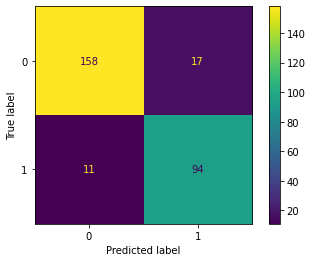

In [ ]:
ConfusionMatrixDisplay(CM_train).plot()

**Visualising the Test set results**

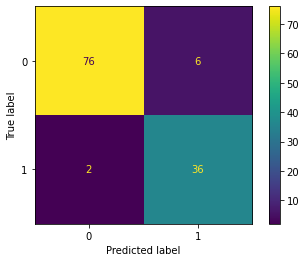

In [ ]:
ConfusionMatrixDisplay(CM).plot()